# Analysis of model convergence for mobility configuration of report 20

This notebook explores the convergence of the model on a consistant prediction as more data is fed into it.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
# %matplotlib notebook

In [3]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

## Method

This analysis is done by comparing the reported, modelled and forecasted deaths for 4 countries: France, Spain, Italy and the UK. These countries were picked as they present similar epidemics as judged by number of deaths. They do however present different lags with Italy's being the most advanced, followed by Spain and France, and finally followed by the UK.

Simulations provided with increasing days of reports are plotted on the same graph. "Convergence" is assessed visually by finding the point at which modelled and forecasted mean lines stop changing as more data is added.

Below are the plotting functions. In each plot data is grouped by code version and the fitting conditions. For France two fitting conditions exist:

- Fitting with influence from Europe and French regions;
- Fitting with influence from French regions only;

The effect of this difference has not been evaluated yet.

In [4]:
from model_analysis import * 

In [5]:
run_manifest = read_manifest('run-manifest.csv')
analysis_set = get_analysis_set(run_manifest)

runs\base-mobility-fullrun-20200527T230708-3790666\base-mobility-fullrun-20200527T230708-3790666-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230708-3790666
runs\base-mobility-fullrun-20200528T223059-3792704\base-mobility-fullrun-20200528T223059-3792704-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T223059-3792704
runs\base-mobility-fullrun-20200526T225333-3789804\base-mobility-fullrun-20200526T225333-3789804-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225333-3789804
runs\base-mobility-fullrun-20200526T225529-3789804\base-mobility-fullrun-20200526T225529-3789804-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225529-3789804
runs\base-mobility-fullrun-20200527T230709-3790665\base-mobility-fullrun-20200527T230709-3790665-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230709-3790665
runs\base-mobility-fullrun-20200528T222228-3792703\base-mobility-fullrun-20200528T222228-3792703-covars-alpha-reduction.

 runs\base-mobility-fullrun-20200527T230805-3790665
runs\base-mobility-fullrun-20200528T222322-3792703\base-mobility-fullrun-20200528T222322-3792703-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222322-3792703
runs\base-mobility-fullrun-20200526T225428-3789803\base-mobility-fullrun-20200526T225428-3789803-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225428-3789803
runs\base-mobility-fullrun-20200527T230804-3790664\base-mobility-fullrun-20200527T230804-3790664-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230804-3790664
runs\base-mobility-fullrun-20200528T222322-3792702\base-mobility-fullrun-20200528T222322-3792702-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222322-3792702
runs\base-mobility-fullrun-20200526T231555-3789805\base-mobility-fullrun-20200526T231555-3789805-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T231555-3789805
runs\base-mobility-fullrun-20200527T230828-3790666\base-mobility-ful

runs\base-mobility-fullrun-20200528T223256-3792704\base-mobility-fullrun-20200528T223256-3792704-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T223256-3792704
runs\base-mobility-fullrun-20200528T222424-3792703\base-mobility-fullrun-20200528T222424-3792703-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222424-3792703
runs\base-mobility-fullrun-20200528T222425-3792702\base-mobility-fullrun-20200528T222425-3792702-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222425-3792702


## Group data in comparable runs

In [6]:
def group_by_version_and_country_num(df, x):
    regions = "No region"
    if df.loc[x, "number of zones"]>14:
        regions = "With regions"
    countries = "France only"
    if df.loc[x, "number of countries"]>1:
        countries = "Europe"
    JOBID = df.loc[x, "folder"][-7:-1]
    try:
        is_original_pooling = df.loc[x, "model"].data["arguments"]["formula_pooling"] \
            == '~ -1 + residential + transit + averageMobility'
    except:
        is_original_pooling = False
    return (df.loc[x, "version"], countries, regions, JOBID, is_original_pooling)

groups = analysis_set.groupby(lambda x : group_by_version_and_country_num(analysis_set, x))

In [7]:
prop_cycle = icl_plot_core.cycler(
    linestyle=[ '-', '--'],
    marker=[' ', 'v'],
    markevery=[ 1, 4]
)
icl_plot_core.default_color_map = plt.get_cmap("viridis")

## Analysis of convergence on France

The next few plots display data for France as a whole modelled from a range of different dates.


Plotting group 22 of 29: ('v5', 'Europe', 'With regions', '378980', True)
Plotting group 23 of 29: ('v5', 'Europe', 'With regions', '379066', True)
Plotting group 24 of 29: ('v5', 'Europe', 'With regions', '379270', True)
Plotting group 27 of 29: ('v5', 'France only', 'With regions', '378980', True)
Plotting group 28 of 29: ('v5', 'France only', 'With regions', '379066', True)
Plotting group 29 of 29: ('v5', 'France only', 'With regions', '379270', True)


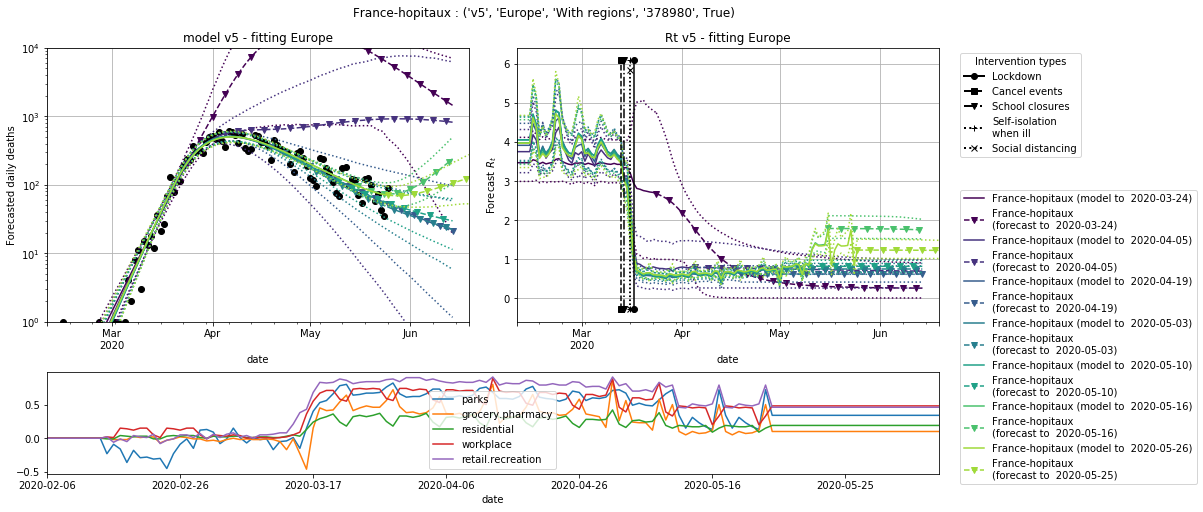

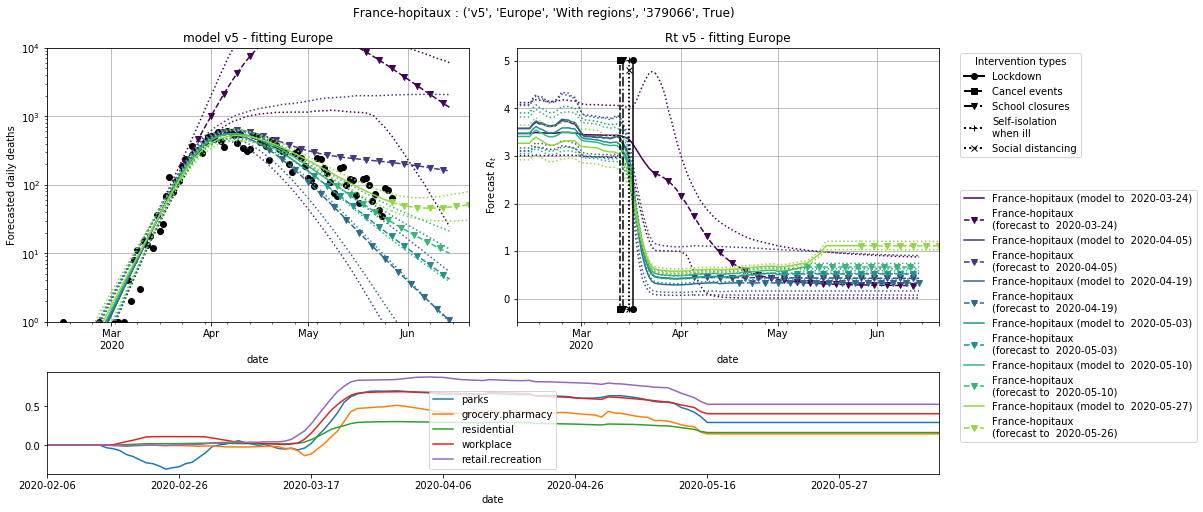

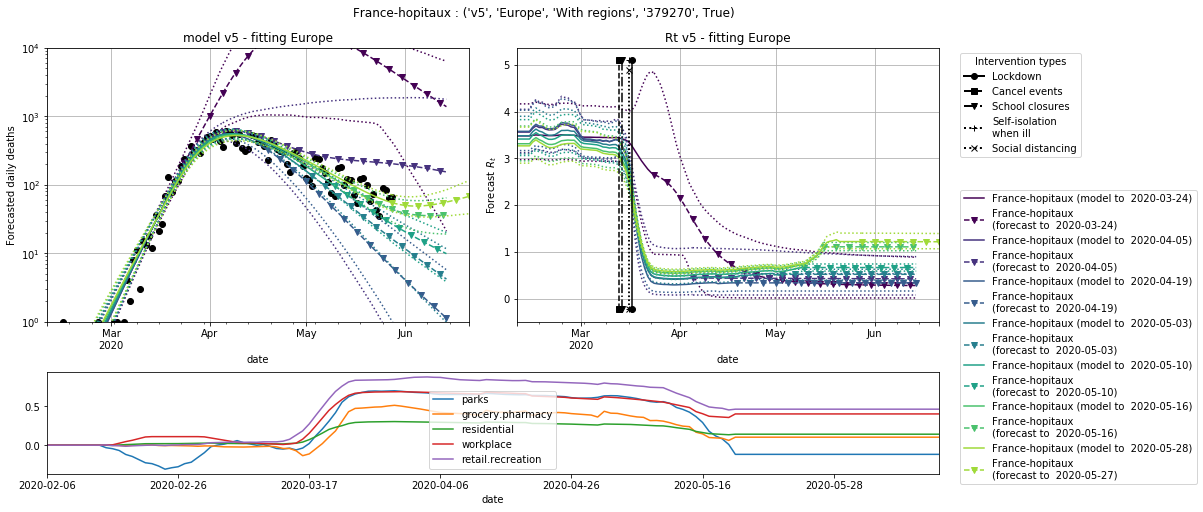

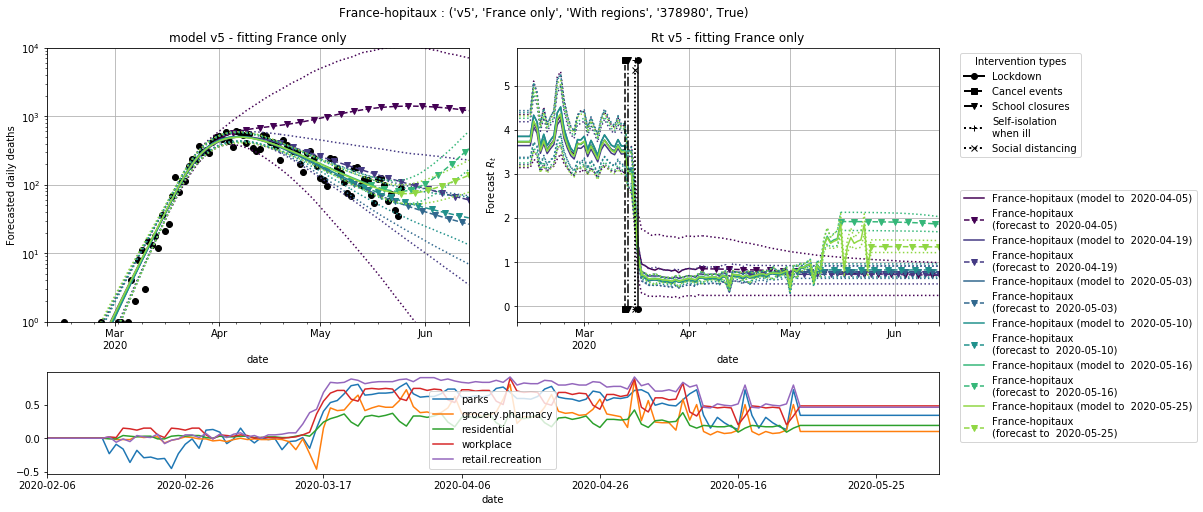

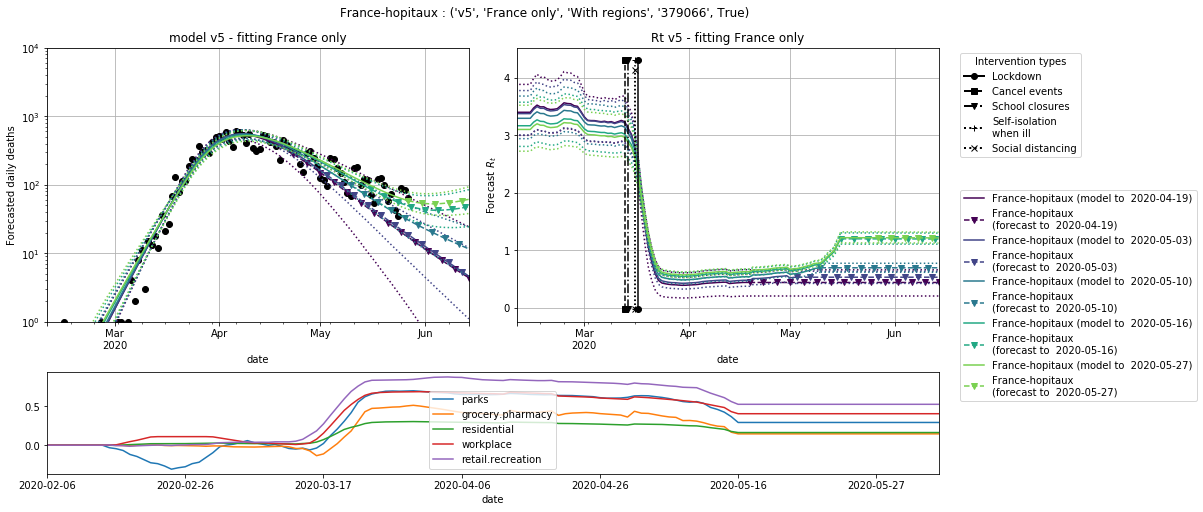

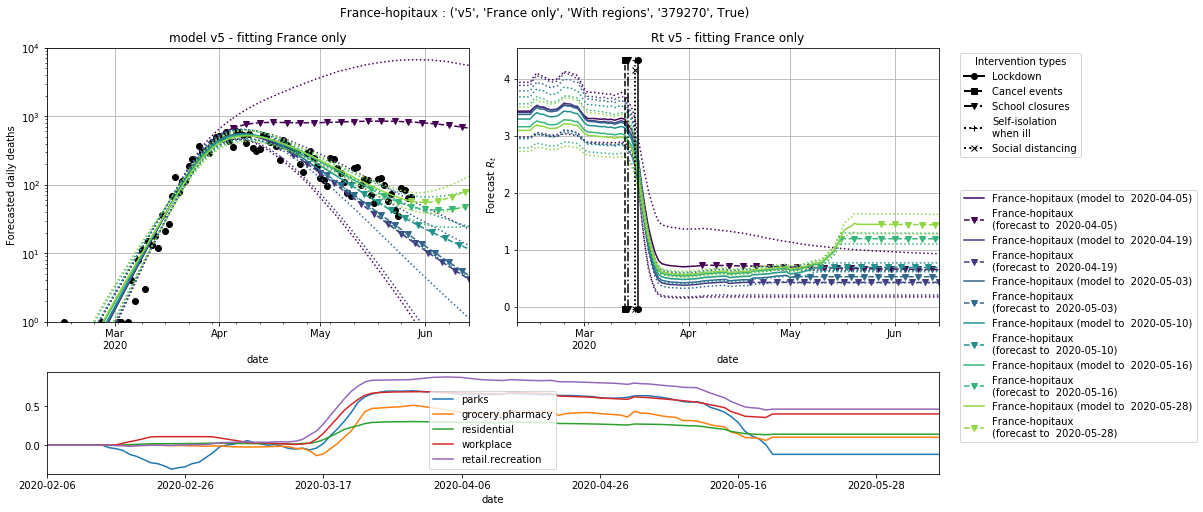

In [8]:
func = lambda x: x[2]=="With regions" and x[0].strip()=="v5" and x[4]
plot_groups(groups, "France-hopitaux", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

## Case study of European countries



In [9]:
func = lambda x: x[1]=="Europe" and x[0].strip()=="v5" and x[2]!="With regions" and x[4]

### Spain

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


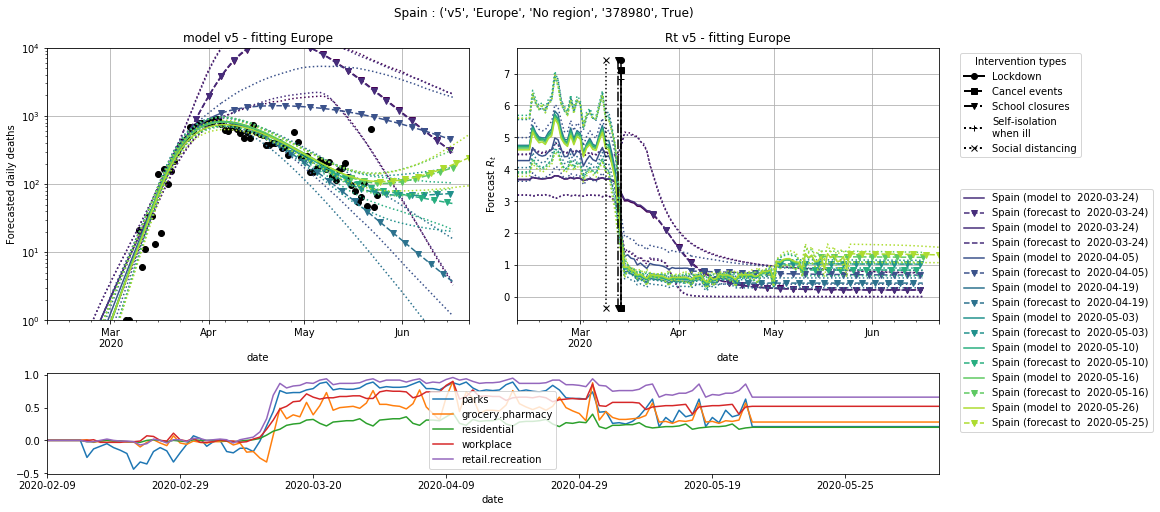

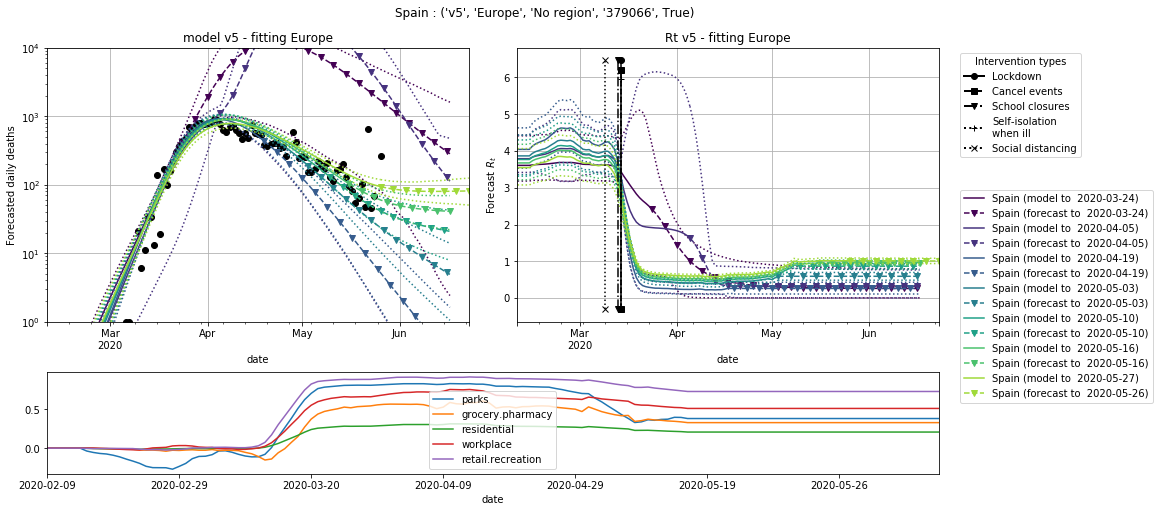

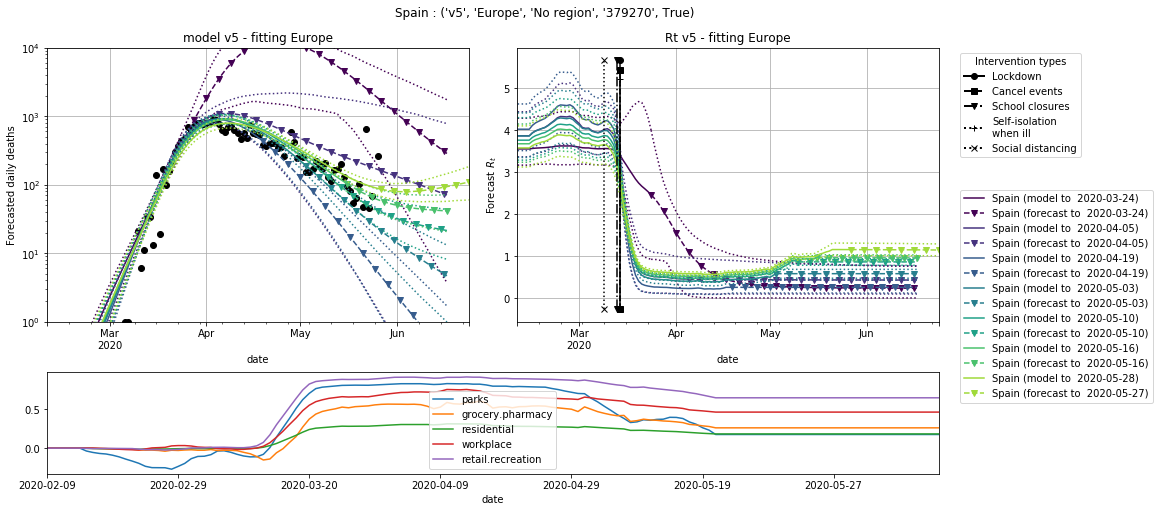

In [10]:
plot_groups(groups, "Spain", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Italy

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


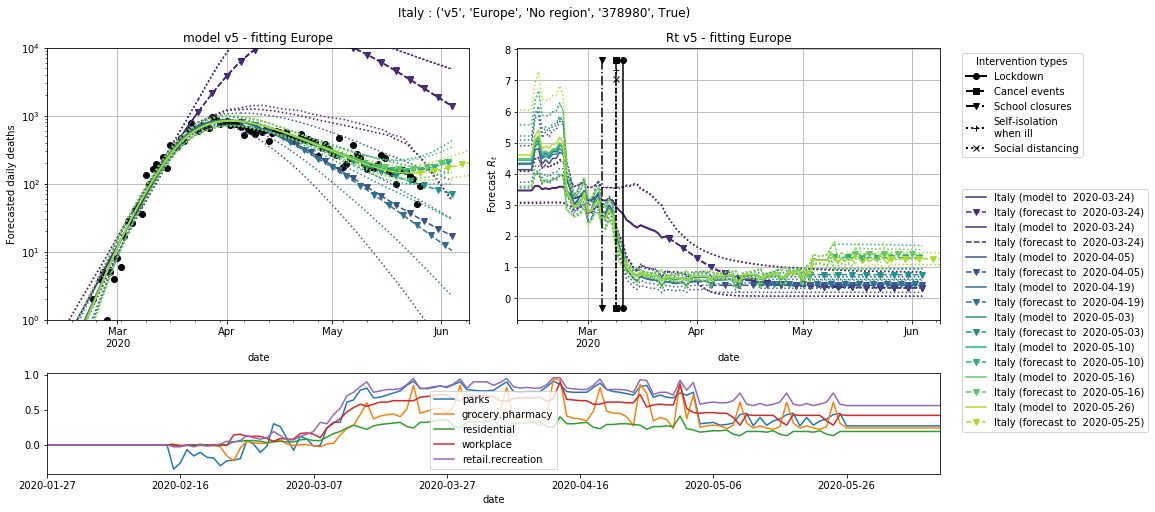

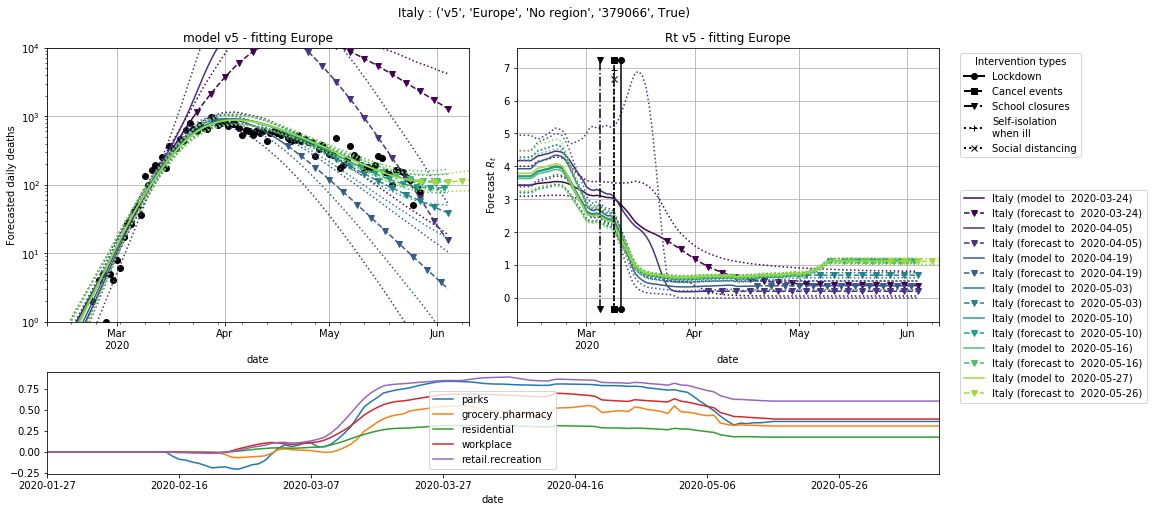

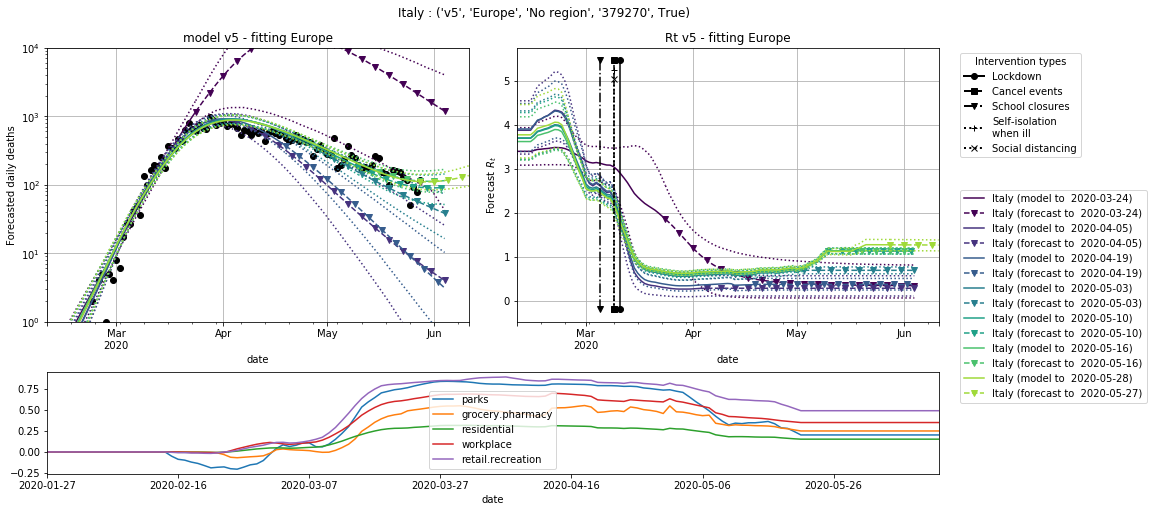

In [11]:
plot_groups(groups, "Italy", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### United_Kingdom

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


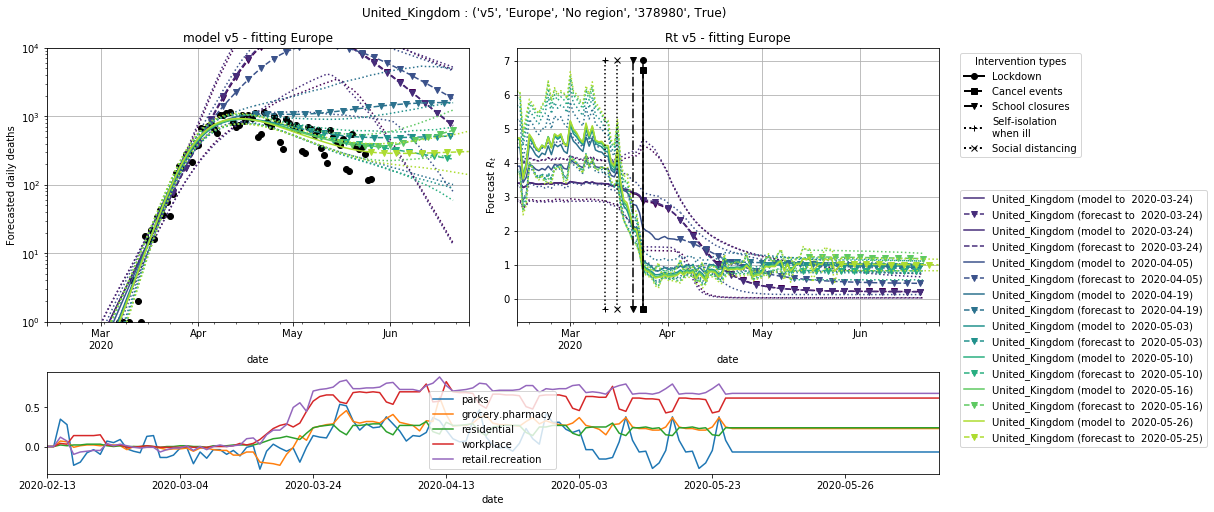

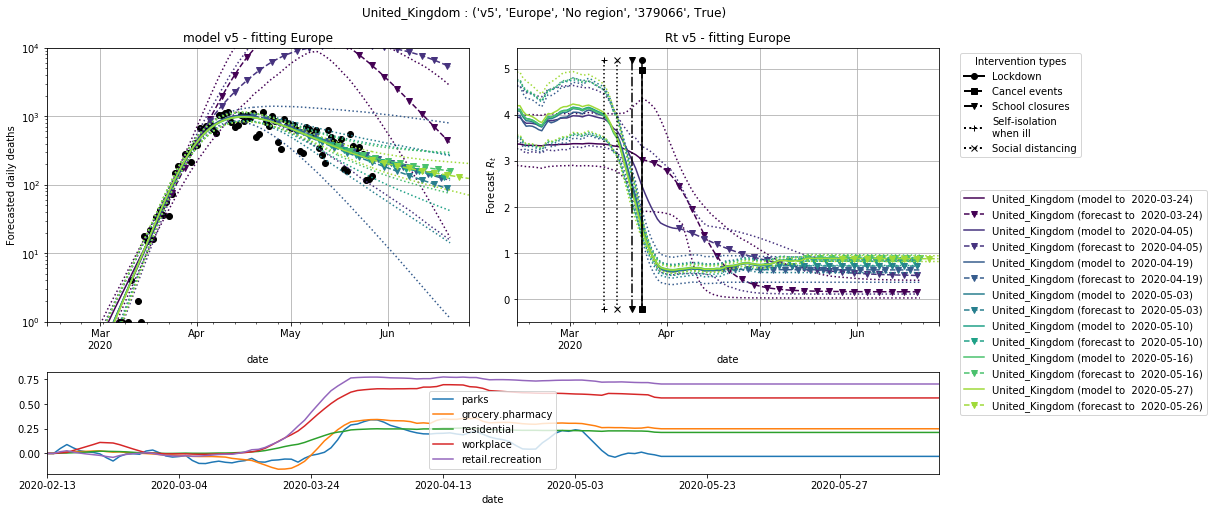

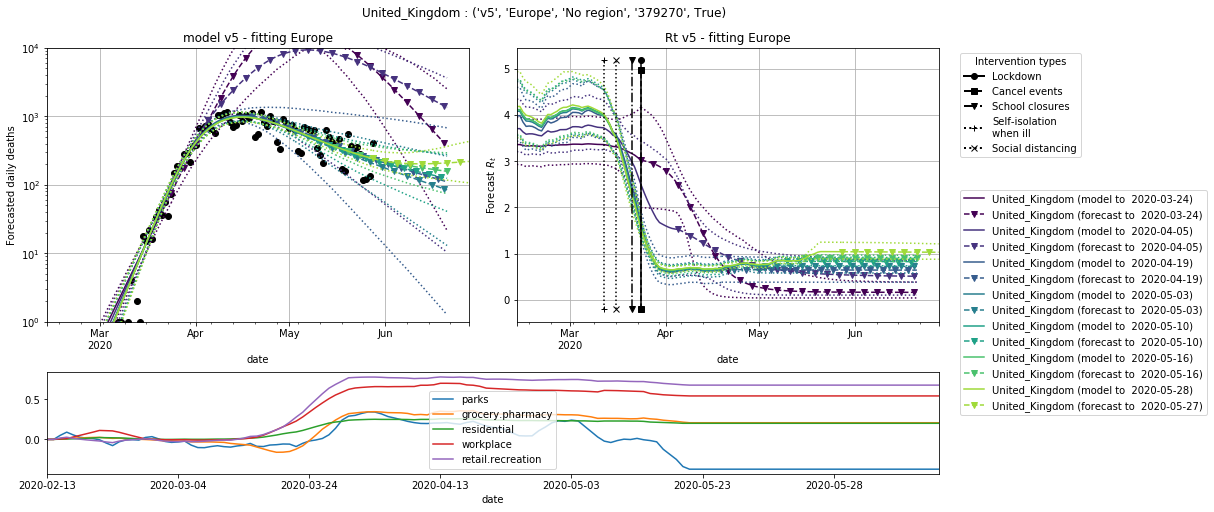

In [12]:
plot_groups(groups, "United_Kingdom", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Germany

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


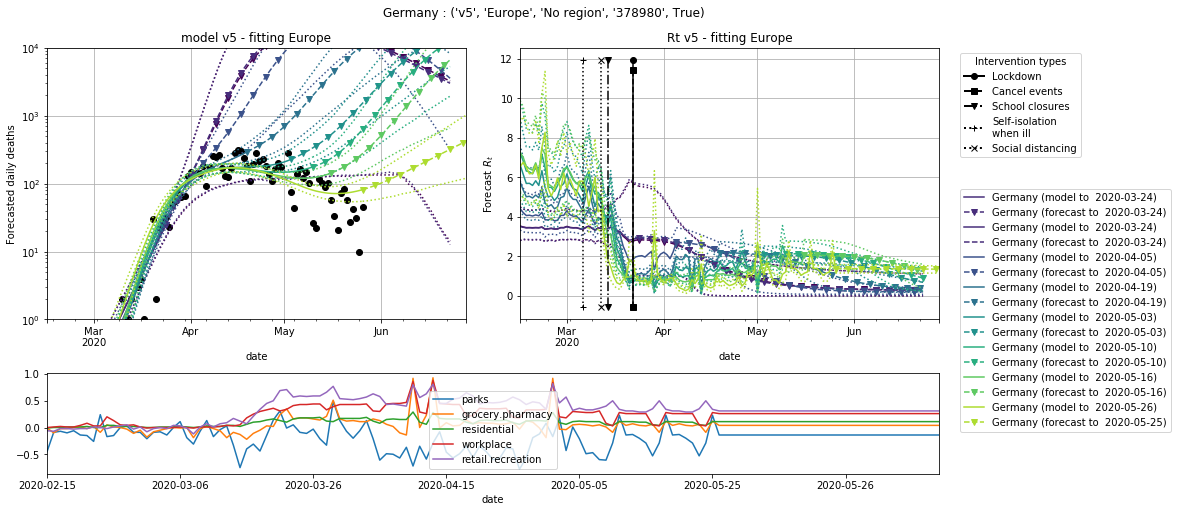

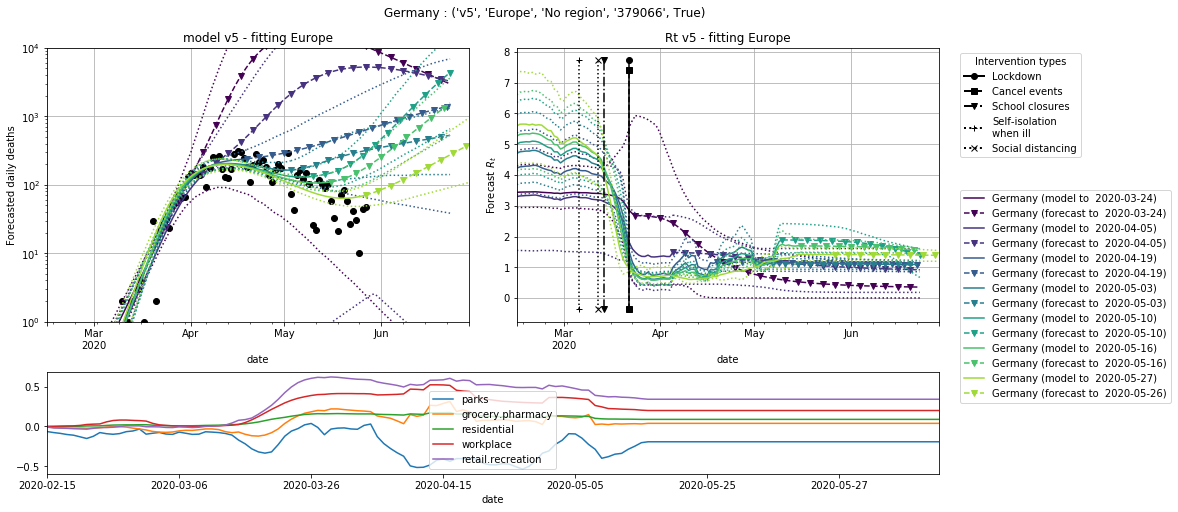

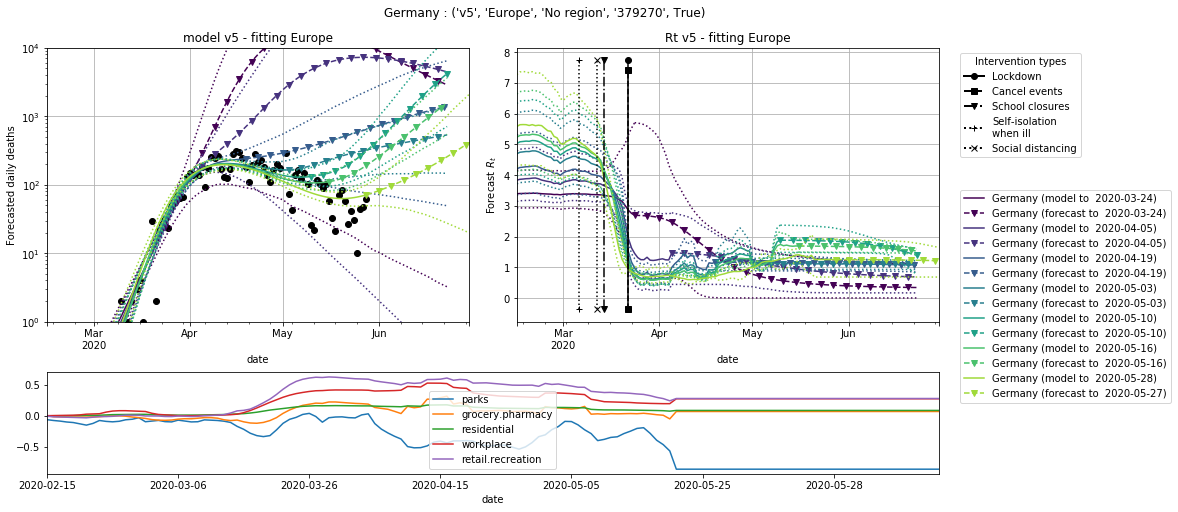

In [13]:
plot_groups(groups, "Germany", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Netherlands

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


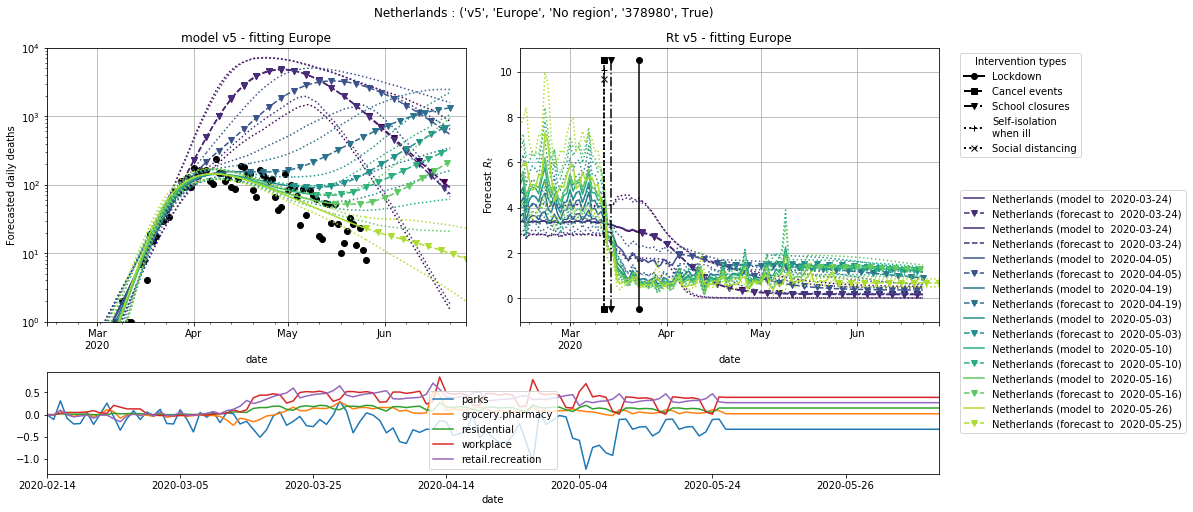

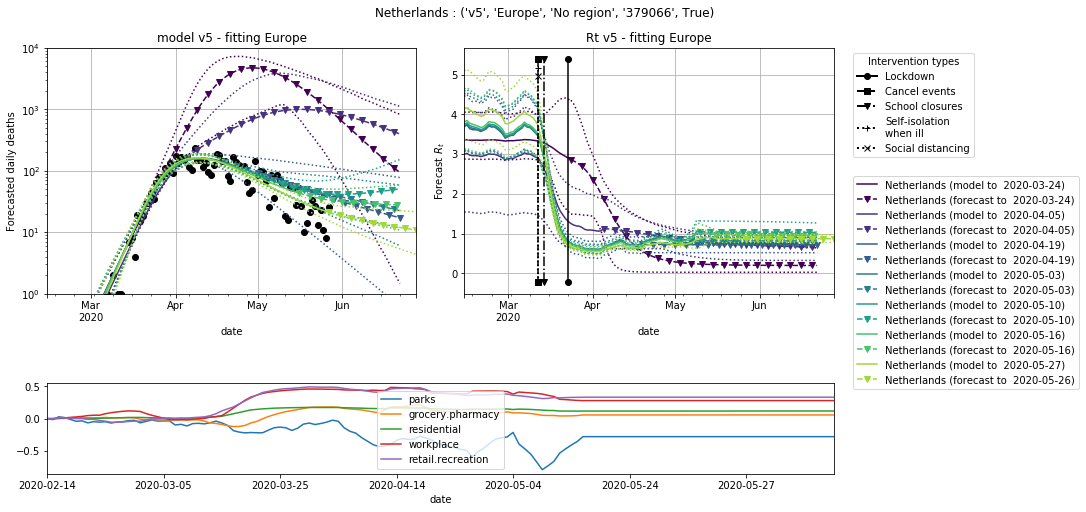

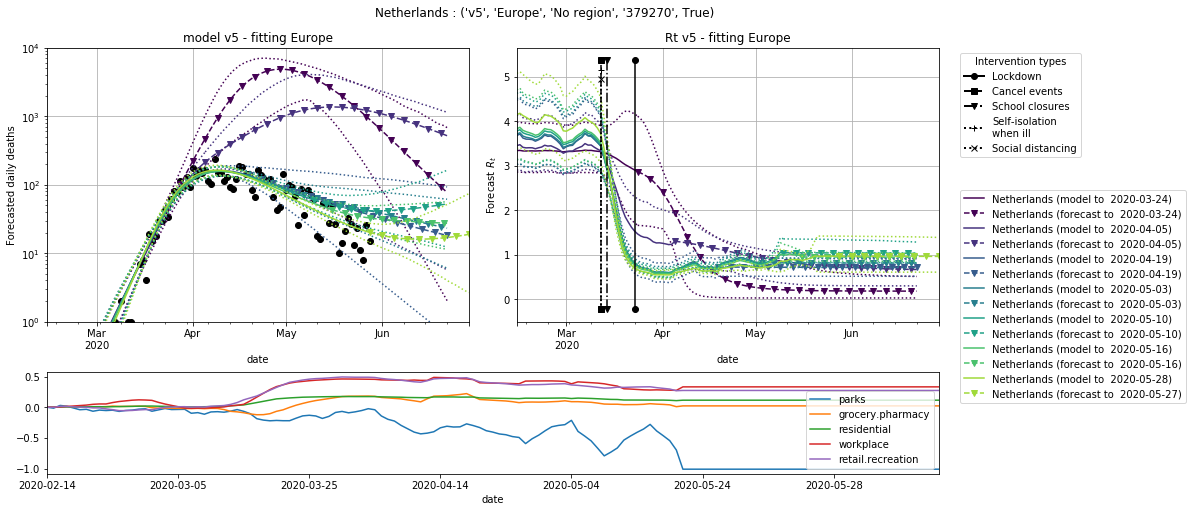

In [14]:
plot_groups(groups, "Netherlands", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Portugal

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


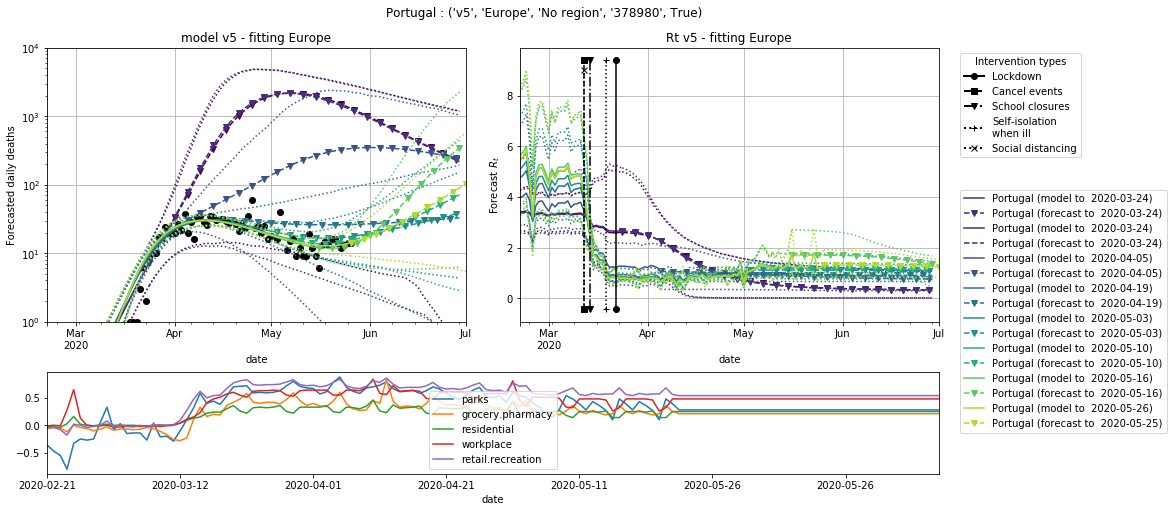

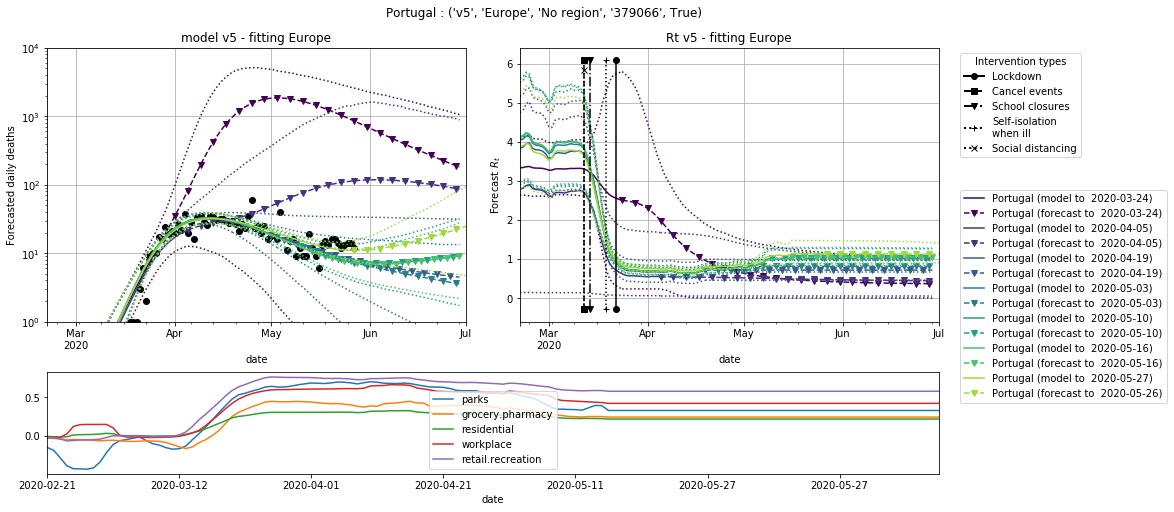

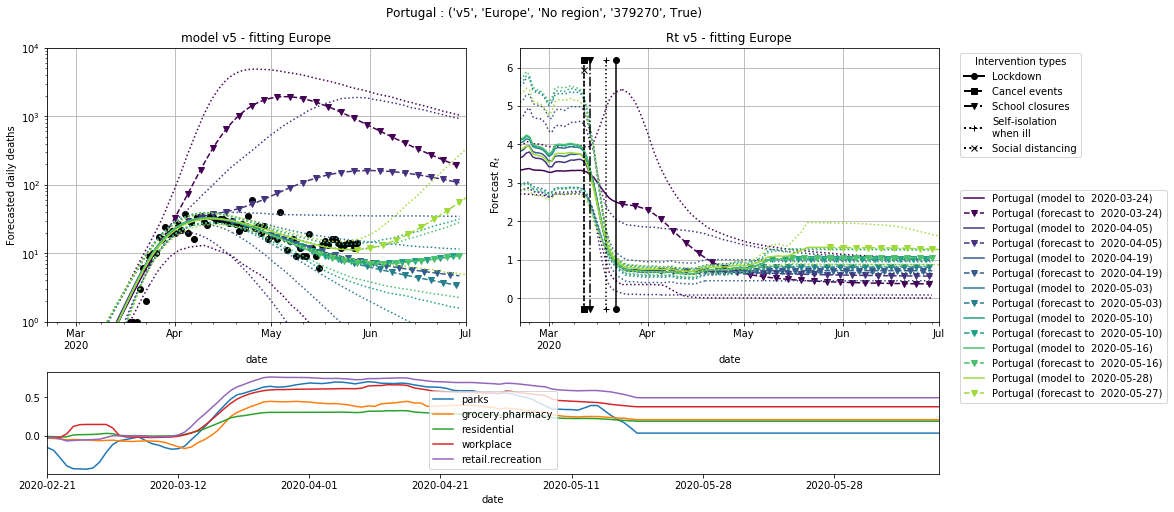

In [15]:
plot_groups(groups, "Portugal", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Denmark

Plotting group 19 of 29: ('v5', 'Europe', 'No region', '378980', True)
Plotting group 20 of 29: ('v5', 'Europe', 'No region', '379066', True)
Plotting group 21 of 29: ('v5', 'Europe', 'No region', '379270', True)


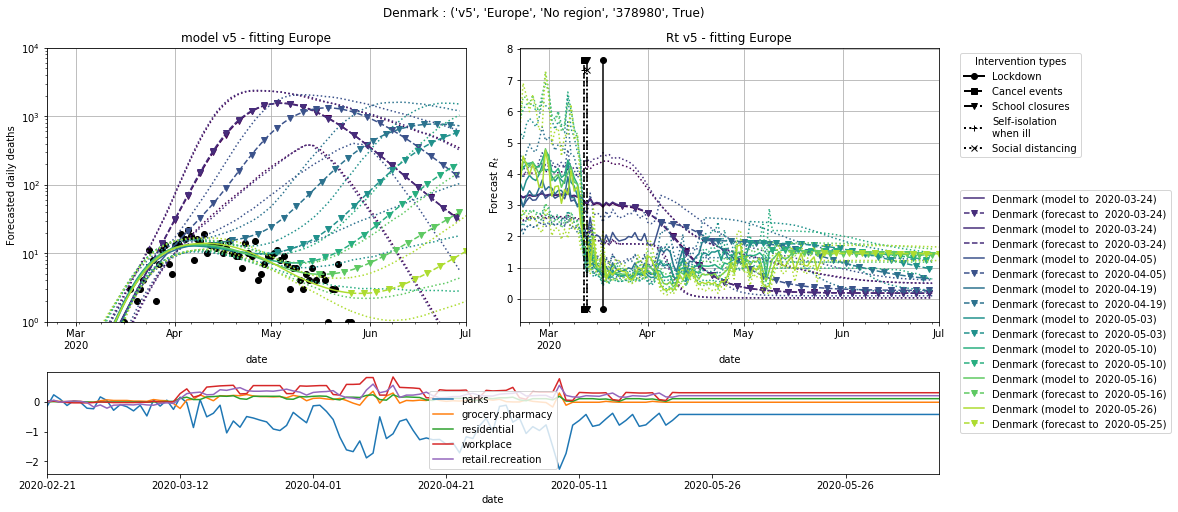

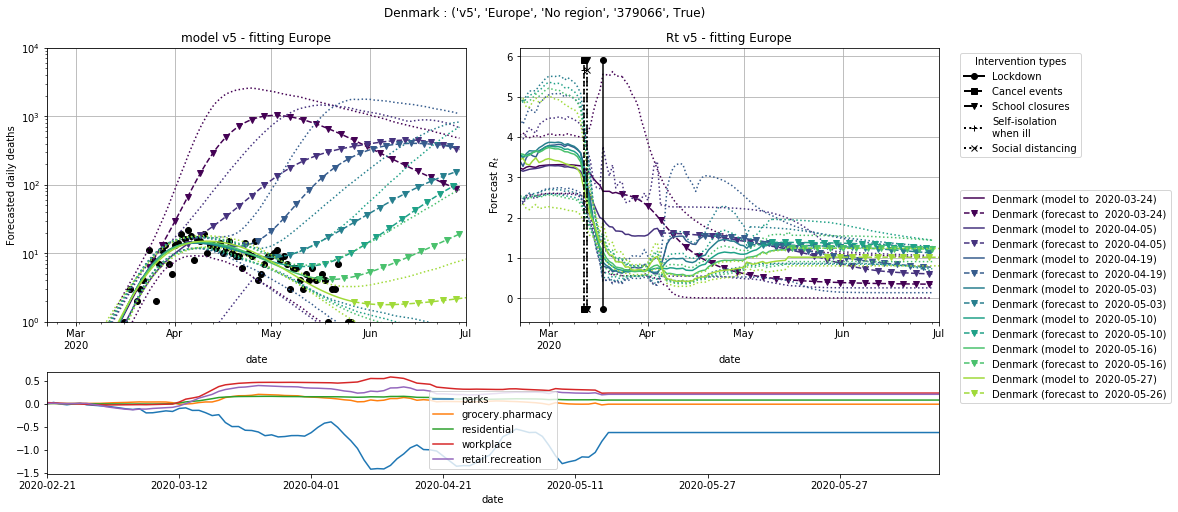

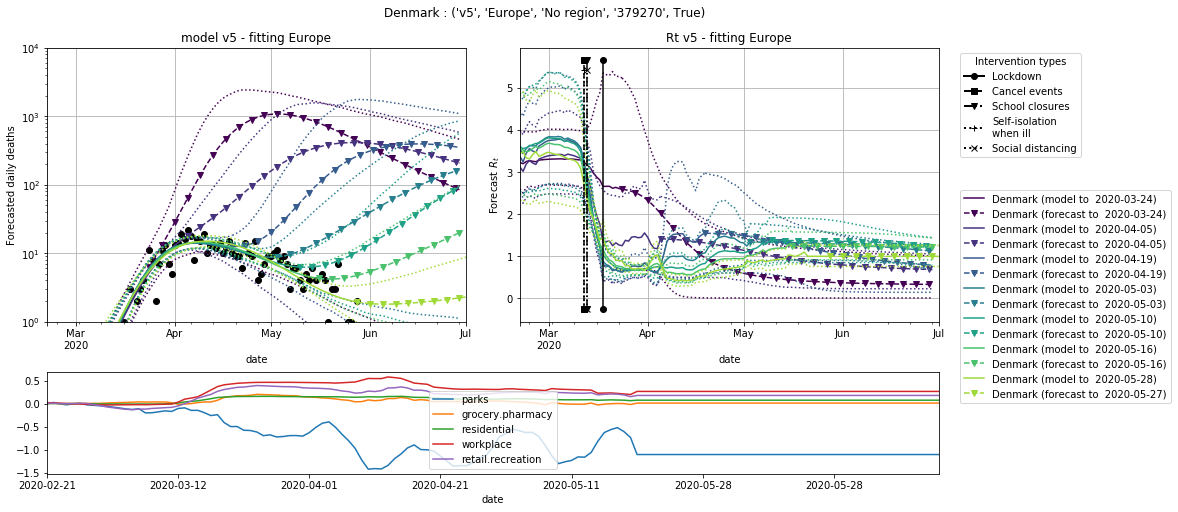

In [16]:
plot_groups(groups, "Denmark", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

## Conclusions

This model doesn't work. This suggests that mobility is not a sufficient predictor of $R_t$ and additional factors are needed.

### Note on convergence



### Future works



## Acknowledgements / Thanks

- The MRC at Imperial for open sourcing the model and their support
- [Nathan Desdouits](https://github.com/nathan-tc) for his advice on cleaning up the colours of the plots.